# Welcome to the Titanic Kaggle Problem

##### It is your job to predict if a passenger survived the sinking of the Titanic or not.  For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable. 

#### Below are a list of the given variables and a brief explanation

##### 1. The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. It's important to note, more predictor variables do not make a better model, but the right variables.
##### 2. The _PassengerID_ and _Ticket_ variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
#### 3. The _Pclass_ variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
#### 4. The _Name_ variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
#### 5. The _Sex_ and _Embarked_ variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
#### 6. The _Age_ and _Fare_ variable are continuous quantitative datatypes.
#### 7. The _SibSp_  variable represents number of related siblings/spouse aboard and _Parch_ represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
#### 8. The _Cabin_ variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

### **Getting started**

#### The first thing we want to do is import all of the necessary libraries. This includes libraries for linear algebra (numpy), data processing (pandas) , data visualization (seaborn and matplotlib), and different algorithms (sklearn) to help make the process easier.


In [1]:
#import libraries:

#linear algebra
import numpy as np 

#data processing 
import pandas as pd 

#data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

####  Next, we need to download the files test.csv and train.csv. Put them into a folder (such as “data”). Then, we can read each file and set it into train and test variables.

In [2]:
#put files into a folder (such as "data")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

### Data Exploration/Analysis

#### Now that our data is imported and our libraries are set up, we can start analyzing some of the data. The function in below allows us to see how many of the variables are floats, ints, and objects. This is important to us because it will help us know how to correctly analyze each variable. We will most likely eventually change all of the variables to integers. 

In [3]:
#train data info: two are floats, 5 are ints, and 5 are objects
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### The function below gives the statistical information for each variable. From the table, we can see that 38.3% of the training set survived the Titanic. We can also see that the passenger’s ages range from 0.4 to 80. We can detect some of the features that contain missing values, such as the _Age_ feature. All of these observations will become useful later on.

In [4]:
#statistical information of the different variables
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### We can get information on the first 15 passengers to get a sense of what the data looks like. From the tables, we can notate that there are some categorical features such as _Sex_, _Name_, and _Embarked_ that we need to convert into numerical ones so that the machine learning algorithms can process them. We can also more clearly see the missing values in _Cabin_. We can observe that many of the features have different ranges so it is important to convert them all to roughly the same scale.

In [5]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Now we can create some functions that will allow us to take a detailed look at what is actually missing. From the table output, we can see that the _Cabin_ feature has 77.1% of its data missing, which may be an indicator that we should drop the _Cabin_ feature. We can also see that _Age_ is missing 19.9% of its data, and _Embarked_ is missing 0.2% of its data. 

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


#### Next, we will start looking at some of the features individually. We plot survival for each age based on sex. From the graphical outputs, we can see that men have a high probability of survival when they are between 18 and 30 years old, while women have a higher chance of survival between age 14 and 40. We can also detect that men have a low chance of survival from age 5 to 18, while women do not. We can also note that infants among both sex groups have a higher chance of survival. Since there are patterns among certain ages, and we want each feature to be roughly on the same scale, we will make age groups later on.

/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


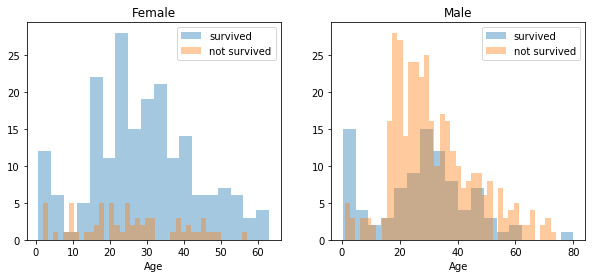

In [7]:
#plot survival rate by age and sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18,label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40,label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

#### We plot survival rate for each class based on _Embarked_ and _Sex_. From these graphs, we can see that _Embarked_ seems to be correlated with _Sex_ based on _Pclass_. Women on port Q and S have a higher chance of survival while men have a higher chance of survival on port C and a lower chance on port Q and S. We can also see that _Pclass_ seems to be correlated with survival. 

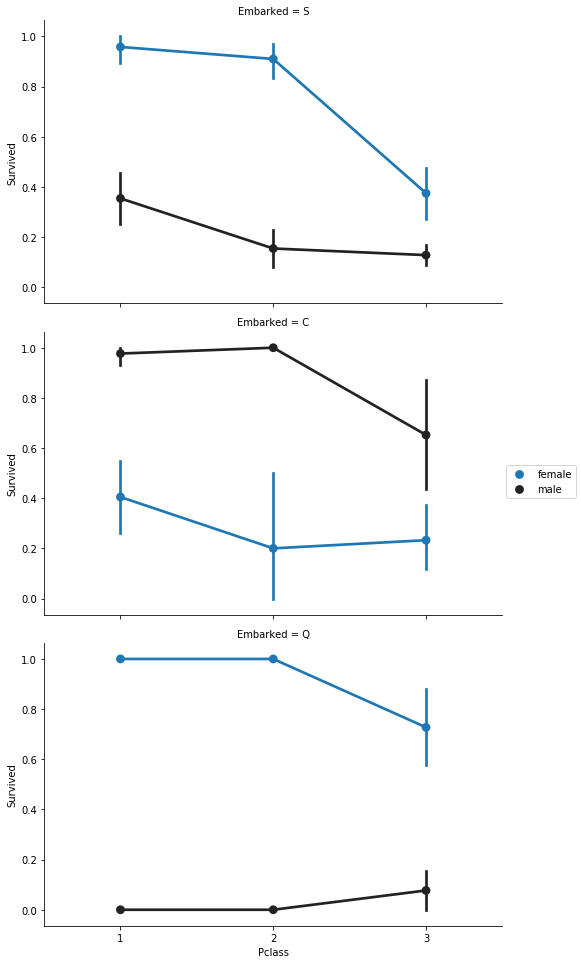

In [8]:
#Plot Survival rate by embarked, pclass, and sex
FacetGrid = sns.FacetGrid(train_df, row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,
             order=None, hue_order=None)
FacetGrid.add_legend()

#### Because _Pclass_ seems to be correlated with survival, we will take closer look at the feature _Pclass_. We can plot a bar plot that shows the percentage of people in each class that survived. We can see that those in Class 1 have the highest chance of survival and those in Class 3 have the lowest. 

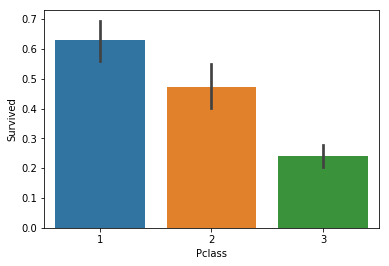

In [9]:
#plot survival rate by pclass
sns.barplot(x='Pclass',y='Survived',data = train_df)

#### We plot a histogram of the survival rate between class based on _Age_. These plots seem to support our assumptions in the previous plots. 

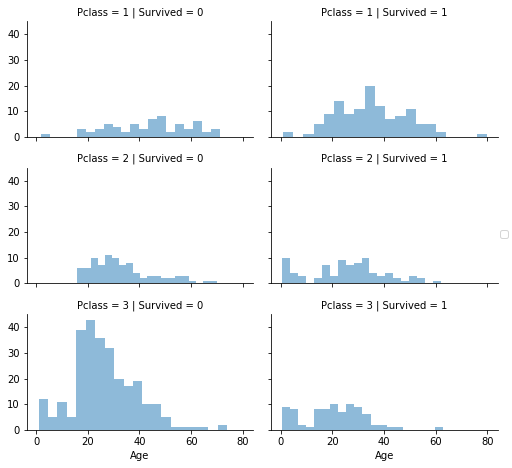

In [10]:
#plot dichotomous survival variable by pclass and age
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist, 'Age',alpha=.5, bins=20)
grid.add_legend();

#### The features _SibSp_ and _Parch_ make more sense as a combined feature since added together shows the number of relatives that each person has. We can nowcreate a new feature ‘relatives’ as well as a feature called not_alone that shows if someone is alone or not. In the output, we can see how many passengers are alone (354) and how many are not (537)

In [11]:
#create new variable that count the number of relatives a person has
#create new variable that shows if someone is not alone
data=[train_df,test_df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0, 'not_alone']=0
    dataset.loc[dataset['relatives']==0, 'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
    
#show amount of people that are not alone vs. alone
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

#### We can also plot the amount of relatives a person has based on whether or not they survived. From the plot we can see that you have a high probability of surviving if you have 1 to 3 relatives, but a lower chance of surviving if you have less than one or more than 3 relatives. 

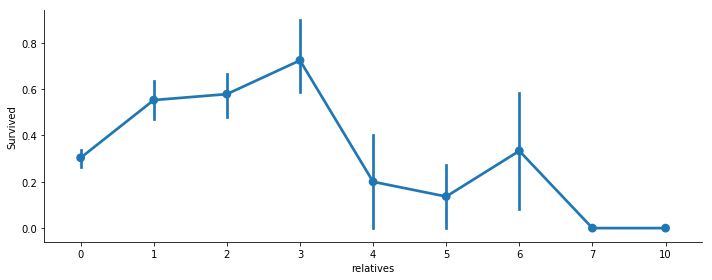

In [12]:
#plot survival rate by number or relatives
axes = sns.factorplot('relatives','Survived',data=train_df,aspect=2.5)

### Data Preprocessing

#### Now that we have done some data analysis, we can move on to the data preprocessing part of the Titanic problem. First, as shown below, we will drop _PassengerId_ because it does not contribute to survival rate. 

In [13]:
#drop feature PassengerId
train_df = train_df.drop(['PassengerId'],axis=1)

#### Next, we can address the problem of missing data. We can observe in the _Cabin_ feature that the first letter in the cabin number such as ‘C123’ refers to the deck. Therefore, iwe can extract these and create a new feature. We want it to be in numerical form, we execute this transformation by mapping each the letters A-U to numbers 1-8 for both the train and test data. We fill in 0’s for missing values and change the type to integers. 

In [14]:
#extract new feature from Embarked that contains a persons deck
#missing values will be converted to 0
#change type to integer
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df,test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

#### Now that we have created a new feature out of _Cabin_, we can drop the old _Cabin_ feature.

In [15]:
#we can now drop the cabin feature
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

#### Next, we can tackle the problem of missing _Age_ values. We will create an array that computes missing values by first finding the mean age value in regards to standard deviation and is_null. We can then just double checks whether or not there are still any missing _Age_ values. 

In [16]:
#compute random numbers between the mean + or - std and the
#size is the number of null values in the dataset
#fill NaN values in Age column with random values we computed
data = [train_df,test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std, mean+std,size=is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

#double check that there are no more NaN values
train_df["Age"].isnull().sum()

0

#### Since the _Embarked_ feature only has 2 missing values, we can find out which value is the most common and fill those in. The describe function lets us know that S is the most common value. Therefore we can loop through the train and test dataset and fill in the empty values with “S”, the most common value.

In [17]:
#find most common Embarked value
train_df['Embarked'].describe()

#fill most common Embarked value into missing values
common_value = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

#### Now that we have filled in all of the missing values, we can move on to making sure each feature is the right type. The output shows us the that _Fare_ is a float and _Name_, _Sex_, _Ticket_, and _Embarked_ are all categorical. 

In [18]:
#check to see what each type of feature is
train_df.info

<bound method DataFrame.info of      Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell,

#### We can fill in any missing _Fare_ values with 0 because later on when we convert _Fare_ to an int, we cannot have any missing values.

In [19]:
#Fill in any missing Fare values
data = [train_df,test_df]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)

#### We can use the _Name_ feature to extract titles from the name in order to build a new feature. We will map 6 main titles to numbers. We then loop through data and extract titles, and then replace the titles with either a more common title or as Rare. After we map the titles, we can convert them back to numbers and replace any missing values with 0 just to be safe. Now that we have transformed our dataset, we can drop the old _Name_ feature.

In [20]:
#extract the Titles from the Name and build a new feature 
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

#drop the Name feature
train_df = train_df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)

#### Next, we want to make the _Sex_ feature numerical instead of categorical. We map females to the number 1 and males to the number 0 for both the train and test data. 

In [21]:
#convert sex feature into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

#### We can show the details of the _Ticket_ feature. We can see that the ticket attribute only 681 unique tickets, so it will be too difficult to convert them into usable categories. Therefore, we will drop the _Ticket_ dataset. 

In [22]:
#find the amount of unique tickets
train_df['Ticket'].describe()

#drop the ticket feature
train_df = train_df.drop(['Ticket'],axis=1)
test_df = test_df.drop(['Ticket'],axis=1)

#### Now we want to convert the _Embarked_ feature from a categorical one to a numeric one. We can do the same thing we did with the _Sex_ feature and map S, C, and Q to 1,2, and 3. 

In [23]:
#convert embarked feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

#### We now need to convert the _Age_ feature from a float to and integer. We will  then create 8 different groups that we map the ages into. This is useful because it allows us to more easily analyze a large dataset and it helps with visual representation.

In [24]:
#convert the age feature from float to int
data is [train_df,test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

#### Since we have created age groups, we can now see the frequency distribution of each age group. 

In [25]:
#list the distribution of age groups we created
train_df['Age'].value_counts()

6    167
4    166
5    142
3    133
2    115
1    100
0     68
Name: Age, dtype: int64

#### For the _Fare_ values, we need convert from float into categories, just as we did with the _Age_ feature. However, if we split all of the fare values into a few equally big categories, most of the values would fall into the first category. Therefore, we can use the “qcut()” function, which splits the data into however many percentage quantiles you assign it. In this case we should have an output of 6 bins that are roughly the same size. The cutoff values are also given, which we can use those to create the 6 categories for both the train and test data, assigned as numbers 0-5. When we are done, we can change the _Fare_ feature into an integer.


In [26]:
#use sklearn "qcut()" function to see how to form 6 Fare categories
Fareqcut = pd.qcut(train_df['Fare'],6,precision=3)
print(Fareqcut.value_counts())

#convert the fare from float to categories by grouping
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.6625), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.6625) & (dataset['Fare'] <= 14.454), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52.369), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52.369, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)


(-0.001, 7.775]      156
(7.775, 8.662]       152
(52.369, 512.329]    149
(14.454, 26.0]       149
(26.0, 52.369]       146
(8.662, 14.454]      139
Name: Fare, dtype: int64


### Creating new features

#### Now we will create a few new feature based on existing features that may help the accuracy of our overall data. This feature, called _Age_Class_ , consists of the _Age_ feature multiplied by the _Class_ feature. 


In [27]:
#create a new feature Age_Class that is Age*Class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### We will create another feature called _Fare_Per_Person_ that takes the _Fare_ feature and divides it by the number of relatives feature that we create + 1 for the passenger. Since _Fare_Per_Person_ values are decimals, we want to also change the type to integers. 

In [28]:
#create a new feature Fare_Per_Person 
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

#### Before we start training the models, we can take a last look at the dataset.

In [29]:
#take a last look at training set before we train the models
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,5,1,1,0,3,3,5,2
2,1,3,1,3,0,0,1,0,0,1,8,2,9,1
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,4,0,0,1,5,1,6,4
7,0,3,0,0,3,1,3,0,4,0,8,4,0,0
8,1,3,1,3,0,2,2,0,2,0,8,3,9,0
9,1,2,1,1,1,0,4,1,1,0,8,3,2,2


### Building Machine Learning Models

#### Since we are done editing the features in our model, we can start to build machine learning models. We create three variables: X_train, Y_train, and X_test. X_train is the set of variables in the train dataset that do not include the survived feature. Y_train consists of only the survived feature from the train dataset.  X_test consists of all of the variables from the test dataset that do not include _PassengerId_. We drop _PassengerId_ now because we had previously only dropped _PassengerId_ from the train dataset.

In [30]:
#create variables X_train, Y_train, and X_test:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

#### The first machine learning model that we will test is the stochastic gradient descent (SGD). This is from one of the sklearn libraries that we imported. Stochastic gradient descent is the dominant method used to train deep learning models, often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression. 

In [31]:
#stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print(round(acc_sgd,2,), "%")

77.22 %


#### The second machine learning model that we will test is the random forest classifier. The random forest classifier creates of a set of decision trees from randomly selected subset of the training set. It then aggregates the votes from different decision trees to decide the final class of the test object. Random forests are very useful in that they can be used for both classification and regression problems, which form the majority of current machine learning systems. 

In [32]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


92.48 %


#### Next, we will test our model with Logistic Regression. Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). 

In [33]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")


81.93 %


#### The next model we will test in is the KNeighborsClassifier model. This model is non-linear and can be used on classes. It can help determine if a data point will be part of one class or another. It looks at the neighboring data points to determine what this new data point will fall into. 

In [34]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

86.31 %


#### Another model we will use is the Gaussian Naive Bayes model. Naive Bayes is a classification algorithm for binary and multi-class classification problems. Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution. 

In [35]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

77.89 %


#### We will also use the Perceptron model, which is a linear classifier (binary). It is also used in supervised learning, and helps to classify the given input data.  

In [36]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")


80.47 %


#### Next, we will test our model using Linear SVC. This is a supervised learning model that analyzes data for classification and regression analysis. 

In [37]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

81.59 %


#### We will lastly test our model in box 46 with a decision tree.  Decision trees are a flowchart-like structure that can be used for both classification and regression, as well as to visually and explicitly represent decisions and decision making. 

In [38]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.48 %


#### We collected the results by listing each score along with its associated model. In order to make the results easier to read, we sorted the values by score. When we print out the table, we can see that the Random Forest classifier seems to be the best model. Before we know for sure, we need to check how random forest performs using cross validation.

In [39]:
#lists model and score in sorted order
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
92.48,Random Forest
92.48,Decision Tree
86.31,KNN
81.93,Logistic Regression
81.59,Support Vector Machines
80.47,Perceptron
77.89,Naive Bayes
77.22,Stochastic Gradient Decent


#### How K-Fold Cross Validation works: The original sample is randomly partitioned in k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 sub samples are used as training data. The cross-validation process is then repeated k times (the folds), which each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. We perform can K-Fold Cross Validation on our random forest model, using 10 folds (K=10). Therefore it outputs an array with 10 different scores.

In [40]:
#K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")


#### We will now print the 10 scores as well as the mean and standard deviation. Now our output looks much more realistic than before. Our model has an approximate average accuracy of 82% with a standard deviation of 4%. This means that the accuracy of the model can differ +-4%.


In [41]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.81111111 0.74157303 0.82022472 0.84269663 0.80898876
 0.78651685 0.76404494 0.84269663 0.85227273]
Mean: 0.801456985586199
Standard Deviation: 0.03865902172428261


### Random Forest

#### Random Forest is a supervised learning algorithm that build multiple decision trees and merges them together to get a more accurate and stable prediction. A great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn computes an “importance” score automatically for each feature after training and scaling the results so that the sum of all importances is equal to 1. 

In [42]:
#compute importance score for each feature
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

#### We can now print out the importances of each feature and plot them in a bar plot for better visual representation. From this we can see that the features _not_alone_ and _Parch_ do not play a significant role in our random forest classifiers prediction process. Therefore , we will drop them from the dataset and train the classifier again. We could remove more or less features, but this would need a more detailed investigation of the features effect on our model.

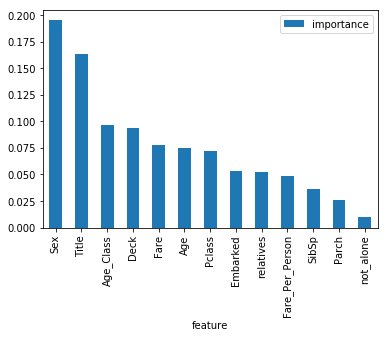

In [43]:
importances.head(15)
importances.plot.bar()

#drop not_alone
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

#drop parch
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

#### We can run the random forest classifier model again. It predicts just as well as it did before. We can evaluate a random-forest classifier by finding an ‘out-of-bag samples’ score to estimate the generalization accuracy. The out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, it removes the need to set aside a test set. Below, we print out the “oob score”.

In [44]:
#training Random Forest again

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

92.48 %
oob score: 79.80000000000001 %


#### We can now start tuning the hyperparameters of random forest. Different model training algorithms require different hyperparameters, and most performance variation can be attributed to just a few hyperparameters. One way to find the best hyperparameters to use is by implementing GridSearchCV, which is shown in the screenshot below. 
![alt text](data/Hyperparam.png "GridSearch")

#### Now that we have GridSearch’s output shown above, we can run the Random Forest Classifier again but with the new parameters that were given to us. This should give us a slightly increased “oob score”. 

In [45]:
# Random Forest with new parameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.71000000000001 %


### Further Evaluation

#### Now that we have a proper model, we can start evaluating its performance in a more accurate way. Previously, we only used accuracy and the “oob score” which is just another form of accuracy. This is not enough, however, because it is more complicated to evaluate a classification model than a regression model.

 #### We will now generate a confusion matrix. This is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. Most performance measure are computed from the confusion matrix. 

In [46]:
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[488,  61],
       [ 95, 247]])

#### The first row in the matrix is about the not-survived-prediction: 496 passengers were correctly classified as not survived (called true negatives) and 53 were wrongly classified as not survived (false positives). The second row is about the survived-predictions: 96 passengers were wrongly classified as survived (false negatives) and 246 were correctly classified as survived (true positives). While this gives a lot of information about how well our model does, there is a way to get even more, such as computing the classifiers precision.

#### Here, we can compute the precision and recall score. This means that our model predicts a passenger’s survival correctly 82% of the time. The recall tells us that it predicted the survival of 72% of the people who actually survived.

In [47]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.801948051948052
Recall: 0.7222222222222222


#### For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That's why the threshold plays an important part. We will plot the precision and recall in with the threshold using matplotlib. We can also plot the precision and recall against each other in a different way and there we can see that the recall is falling off rapidly at about 85%. 

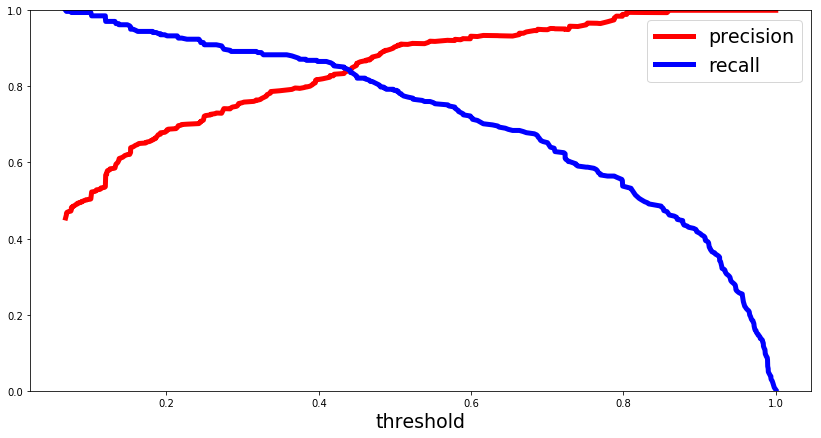

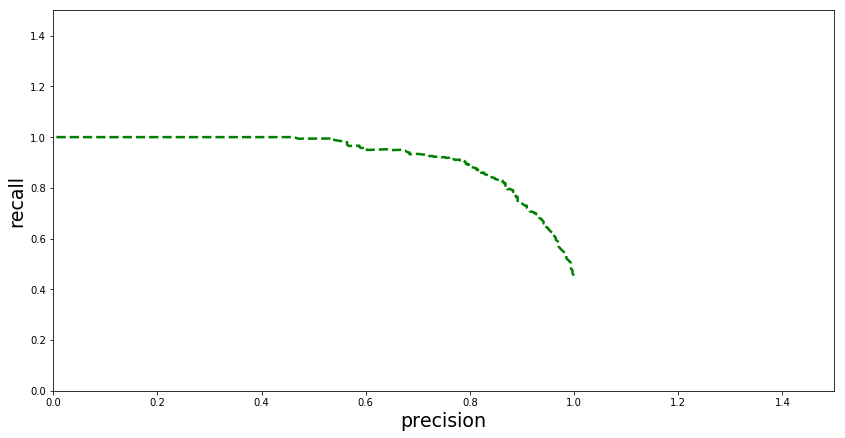

In [48]:
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

#plot precision and recall
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#another way to plot precision and recall
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

#### ROC AUC Curve: Another way to evaluate and compare the binary classifier is to plot a [ROC AUC Curve](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc). The curve plots the true positive rate against the false positive rate. The red line in the middle represents a purely random classifier (e.g. a coin flip). We want our classifier to be as far away from it as possible. Based on our graph, our random forest model seems to do a good job. The ROC AUC score is computed by measuring the area under the curve, called the AUC. A best possible classifier would have an score of 1 and a completely random classifier would have a score of 0.5. 

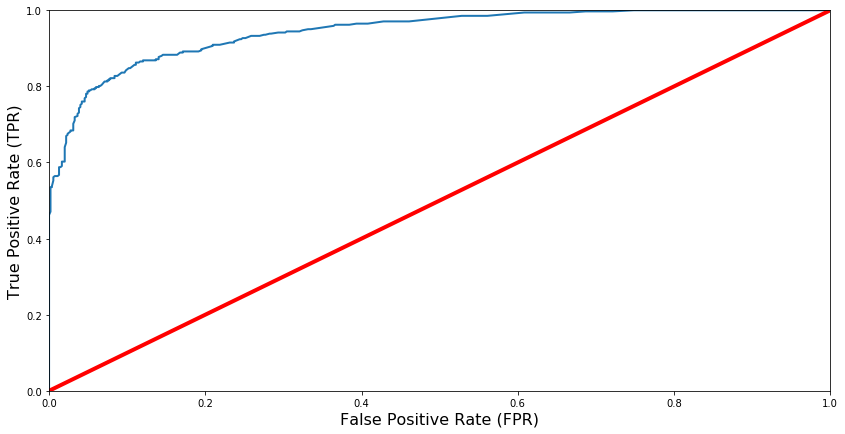

ROC-AUC-Score: 0.9443565653660563


In [49]:
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


#find the area under the curve score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

#### We can now import the proper library and print the ROC AUC score, which is 0.94433259834.  